<a href="https://colab.research.google.com/github/Rakesht31/Artificial-intelligence/blob/main/salary_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing pandas and numpy libraries


In [ ]:
import pandas as pd
import numpy as np

Loading data set from our local computer

In [ ]:
dataset = pd.read_csv('salary.csv')

Sumarrizing Data set


In [ ]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


**Mapping Salary data into Binery Value **

In [ ]:
income_set= set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0,'>50K': 1}).astype("int")
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [ ]:
x =dataset.iloc[: ,:-1]
x

,age,education.num,capital.gain,hours.per.week
0,90,9,0,40
1,82,9,0,18
2,66,10,0,40
3,54,4,0,40
4,41,10,0,40
...,...,...,...,...
32556,22,10,0,40
32557,27,12,0,38
32558,40,9,0,40
32559,58,9,0,40


In [ ]:
y = dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.25, random_state = 0) 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_tarin = sc.fit_transform (x_train)
x_test = sc.transform (x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

Text(0, 0.5, 'Mean Error')

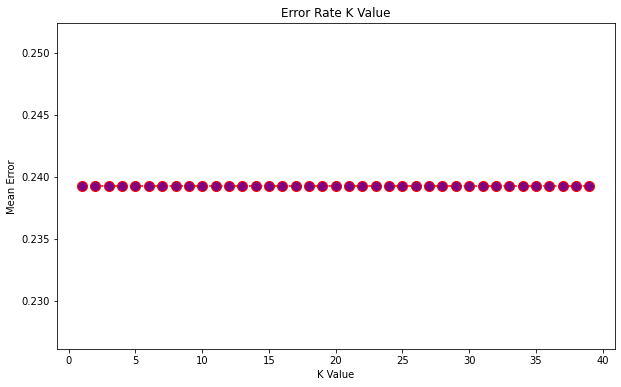

In [ ]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
  model= KNeighborsClassifier(n_neighbors= i)
  model.fit(x_train, y_train)
  pred_i = model.predict(x_test)
  error.append(np.mean(pred_i != y_test))
  
plt.figure(figsize= (10, 6))
plt.plot(range(1,40), error, color='Red', linestyle='dashed', marker ='o', markerfacecolor='purple', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel ('Mean Error')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier (n_neighbors = 16 , metric = 'minkowski', p = 2)
model.fit (x_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [ ]:
age = int(input("Enter New Employee's Age :"))
edu = int(input("Enter New Employee's Education :"))
cg =  int(input("Enter New Employee's Capital Gain :"))
wh = int(input("Enter New Employee's Hour's per Week :"))
newemp = [[age, edu, cg, wh]]
result = model.predict(sc.transform(newemp))
print(result)

if result == 1:
  print("Employee Might Got Salary Above 50K")
else:
  print("Customer Might Not Got Salary Above 50K")  


Enter New Employee's Age :60
Enter New Employee's Education :9
Enter New Employee's Capital Gain :0
Enter New Employee's Hour's per Week :40
[0]
Customer Might Not Got Salary Above 50K


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix (y_test, y_pred)

print("confusion matrix :")
print(cm)

print("Accuracy of the model : {0}%".format(accuracy_score(y_test, y_pred)*100))

confusion matrix :
[[6193    0]
 [1948    0]]
Accuracy of the model : 76.07173565900996%
